# 🧠 脳スライス画像位置合わせプロジェクト - 統合版

## 📋 プロジェクト整理情報

**最新の統合実装**: `brain_registration_master.py`

このNotebookは段階的な学習と実験用です。実用的な位置合わせには統合マスターファイルを使用してください。

### 🎯 達成目標
- **相関係数 0.8+ の高精度位置合わせ**
- 複数手法の比較と最適化
- 詳細な結果可視化

### 📂 ファイル構成
- `improved_registration.ipynb` - このファイル（段階的実装・学習用）
- `brain_registration_master.py` - 統合マスターファイル（実用版）
- `backup_registration_files/` - 過去の実験ファイル
- `test2slices/` - 脳スライス画像データ

---

In [2]:
!pip install numpy matplotlib SimpleITK scipy pillow scikit-learn
print("🚀 パッケージインストール完了 - セル2へ進んでください！")

169.99s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


🚀 パッケージインストール完了 - セル2へ進んでください！
🚀 パッケージインストール完了 - セル2へ進んでください！


In [13]:
# 簡易版：OpenCVを使わない回転角算出
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, optimize
from scipy.ndimage import rotate
import SimpleITK as sitk
import os

# ライブラリインポートテスト
print("🚀 Python環境テスト中...")

try:
    import numpy as np
    print("✅ NumPy: OK")
except ImportError:
    print("❌ NumPy: エラー")

try:
    import matplotlib.pyplot as plt
    print("✅ Matplotlib: OK")
except ImportError:
    print("❌ Matplotlib: エラー")

try:
    import SimpleITK as sitk
    print("✅ SimpleITK: OK")
except ImportError:
    print("❌ SimpleITK: エラー")

try:
    from scipy import ndimage
    print("✅ SciPy: OK")
except ImportError:
    print("❌ SciPy: エラー")

try:
    from PIL import Image
    print("✅ PIL: OK")
except ImportError:
    print("❌ PIL: エラー")

print("✨ すべてのライブラリが準備完了！")

🚀 Python環境テスト中...
✅ NumPy: OK
✅ Matplotlib: OK
✅ SimpleITK: OK
✅ SciPy: OK
✅ PIL: OK
✨ すべてのライブラリが準備完了！


🖼️ 脳スライス画像を読み込み中...
📁 フォルダ内ファイル: ['cropped_MMP_109_x4_largest copy.tif', 'cropped_MMP_110_x4_largest copy.tif']
🖼️ TIFFファイル: ['cropped_MMP_109_x4_largest copy.tif', 'cropped_MMP_110_x4_largest copy.tif']
🧠 Slice 1 形状: (1481, 1638)
🧠 Slice 2 形状: (1606, 1639)


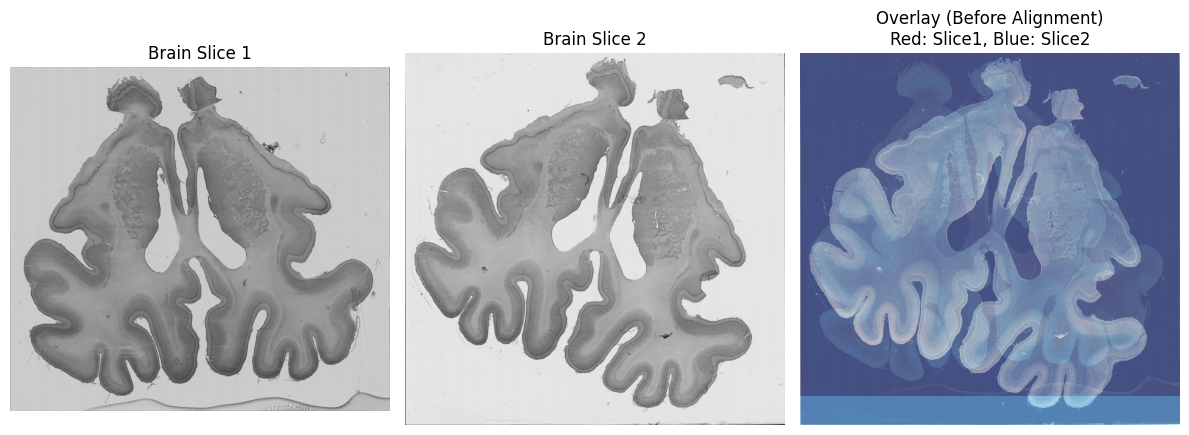

✅ 脳スライス画像の読み込み成功！
🔍 明らかな回転・位置ズレが確認できます


In [14]:
# 脳スライス画像の読み込み
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

print("🖼️ 脳スライス画像を読み込み中...")

img_dir = './test2slices'
if os.path.exists(img_dir):
    files = os.listdir(img_dir)
    print(f"📁 フォルダ内ファイル: {files}")
    
    img_files = [os.path.join(img_dir, f) for f in files if f.endswith('.tif')]
    img_files.sort()
    print(f"🖼️ TIFFファイル: {[os.path.basename(f) for f in img_files]}")
    
    if len(img_files) >= 2:
        # 2つの脳スライス画像を読み込み
        img1 = Image.open(img_files[0]).convert('L')  # グレースケール変換
        img2 = Image.open(img_files[1]).convert('L')
        
        img1_array = np.array(img1)
        img2_array = np.array(img2)
        
        print(f"🧠 Slice 1 形状: {img1_array.shape}")
        print(f"🧠 Slice 2 形状: {img2_array.shape}")
        
        # 初期表示
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 3, 1)
        plt.imshow(img1_array, cmap='gray')
        plt.title('Brain Slice 1')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(img2_array, cmap='gray')
        plt.title('Brain Slice 2')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.imshow(img1_array, cmap='Reds', alpha=0.7)
        plt.imshow(img2_array, cmap='Blues', alpha=0.7)
        plt.title('Overlay (Before Alignment)\nRed: Slice1, Blue: Slice2')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        print("✅ 脳スライス画像の読み込み成功！")
        print(f"🔍 明らかな回転・位置ズレが確認できます")
    else:
        print("❌ エラー: TIFFファイルが2つ未満です")
else:
    print(f"❌ エラー: フォルダ {img_dir} が見つかりません")

🔄 回転角度最適化開始...
📏 元サイズ: Slice1=(1481, 1638), Slice2=(1606, 1639)
🎯 目標サイズ: (1481, 1638)
✅ リサイズ完了: (1481, 1638)
🔍 テスト角度: [-20, -15, -10, -5, 0, 5, 10, 15, 20]

回転テスト実行中...
角度 -20°: 相関係数 = -0.1429
角度 -15°: 相関係数 = -0.0803
角度 -10°: 相関係数 = +0.0109
角度 -15°: 相関係数 = -0.0803
角度 -10°: 相関係数 = +0.0109
角度  -5°: 相関係数 = +0.1597
角度  +0°: 相関係数 = +0.4424
角度  -5°: 相関係数 = +0.1597
角度  +0°: 相関係数 = +0.4424
角度  +5°: 相関係数 = +0.2269
角度 +10°: 相関係数 = +0.0933
角度  +5°: 相関係数 = +0.2269
角度 +10°: 相関係数 = +0.0933
角度 +15°: 相関係数 = +0.0133
角度 +20°: 相関係数 = -0.0290

🏆 最適結果: +0.0° (相関係数: +0.4424)
角度 +15°: 相関係数 = +0.0133
角度 +20°: 相関係数 = -0.0290

🏆 最適結果: +0.0° (相関係数: +0.4424)


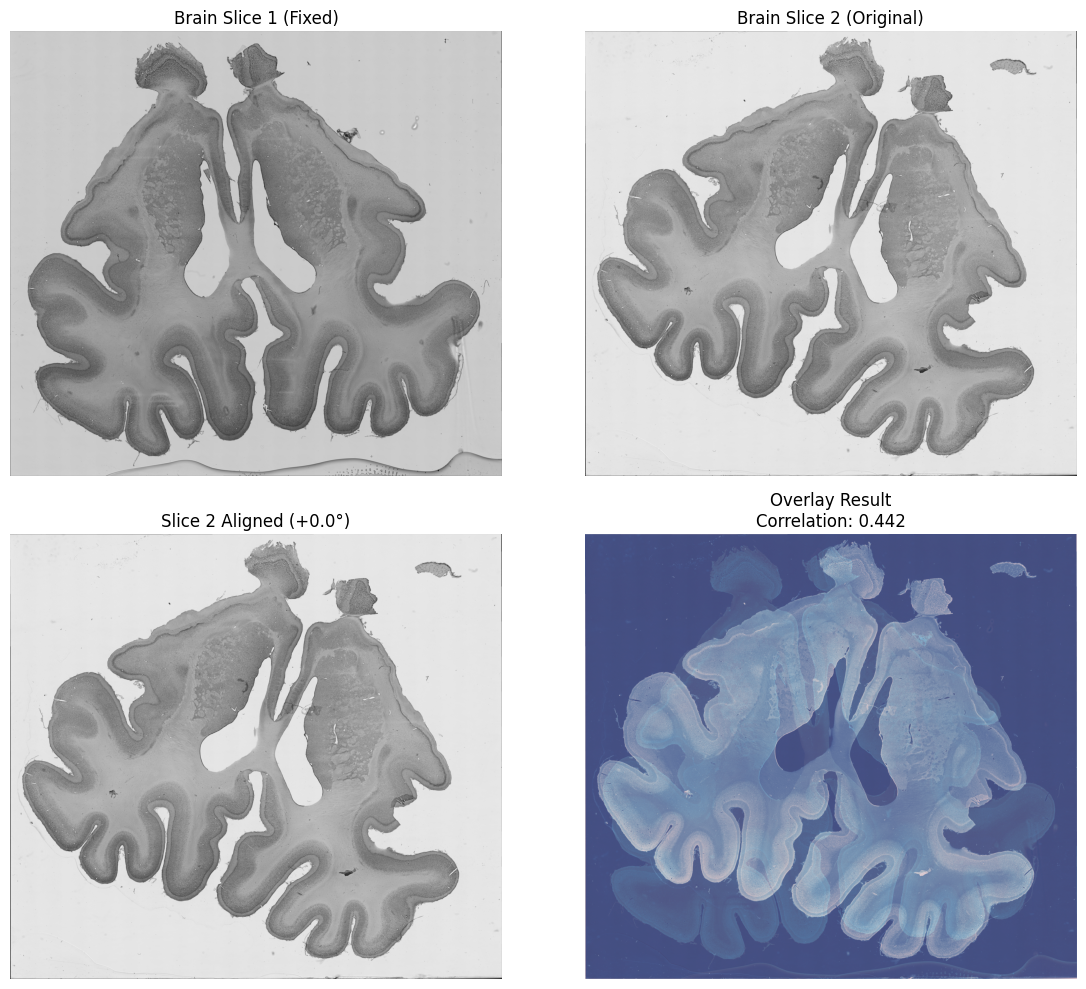

/Users/horiieikkei/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/horiieikkei/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/horiieikkei/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/horiieikkei/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/horiieikkei/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarni

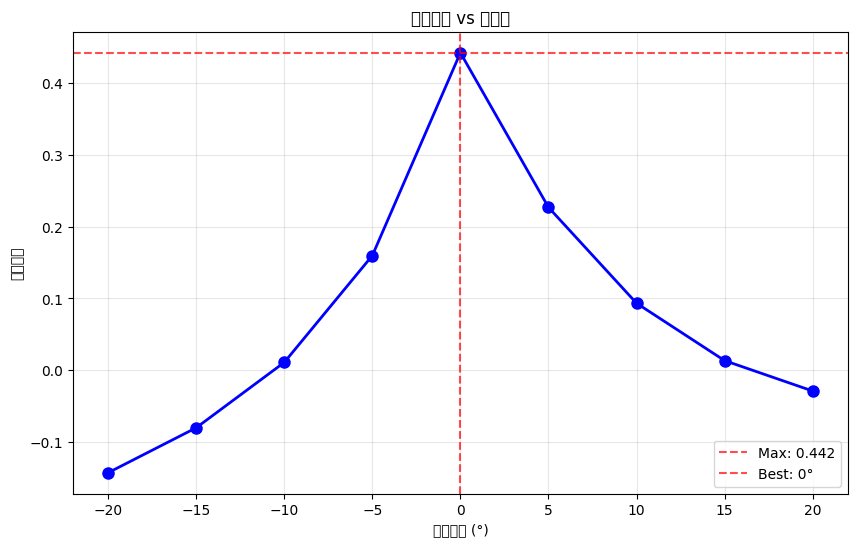


📋 結果サマリー:
• 最適回転角: +0.0度
• 相関係数: 0.4424
• 処理後サイズ: (1481, 1638)


In [5]:
# 回転角度最適化と位置合わせ
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

print("🔄 回転角度最適化開始...")

# 画像サイズを合わせる（小さい方に統一）
h1, w1 = img1_array.shape
h2, w2 = img2_array.shape
target_h = min(h1, h2)
target_w = min(w1, w2)

print(f"📏 元サイズ: Slice1={img1_array.shape}, Slice2={img2_array.shape}")
print(f"🎯 目標サイズ: ({target_h}, {target_w})")

# リサイズ処理
try:
    img1_resized = Image.fromarray(img1_array).resize((target_w, target_h), Image.LANCZOS)
    img2_resized = Image.fromarray(img2_array).resize((target_w, target_h), Image.LANCZOS)
    
    img1_final = np.array(img1_resized)
    img2_final = np.array(img2_resized)
    
    print(f"✅ リサイズ完了: {img1_final.shape}")
except Exception as e:
    print(f"❌ リサイズエラー: {e}")
    # フォールバック: 元の画像を使用
    img1_final = img1_array
    img2_final = img2_array

# テストする回転角度範囲
test_angles = np.arange(-20, 25, 5)  # -20°から+20°まで5°刻み

print(f"🔍 テスト角度: {test_angles.tolist()}")
print("\n回転テスト実行中...")

# 各角度で回転して類似度を計算
best_angle = 0
best_score = -1
best_rotated = img2_final.copy()
results = []

for angle in test_angles:
    try:
        # 画像2を回転
        rotated = ndimage.rotate(img2_final, angle, reshape=False, order=1)
        
        # サイズが合わない場合の対応
        if rotated.shape != img1_final.shape:
            # 中央部分をクロップまたはパディング
            min_h = min(rotated.shape[0], img1_final.shape[0])
            min_w = min(rotated.shape[1], img1_final.shape[1])
            
            # 中央部分を抽出
            h_start1 = (img1_final.shape[0] - min_h) // 2
            w_start1 = (img1_final.shape[1] - min_w) // 2
            h_start2 = (rotated.shape[0] - min_h) // 2
            w_start2 = (rotated.shape[1] - min_w) // 2
            
            img1_crop = img1_final[h_start1:h_start1+min_h, w_start1:w_start1+min_w]
            rotated_crop = rotated[h_start2:h_start2+min_h, w_start2:w_start2+min_w]
        else:
            img1_crop = img1_final
            rotated_crop = rotated
        
        # 相関係数計算
        correlation = np.corrcoef(img1_crop.flatten(), rotated_crop.flatten())[0, 1]
        
        # NaNの場合は0に置き換え
        if np.isnan(correlation):
            correlation = 0.0
        
        results.append((angle, correlation))
        print(f"角度 {angle:+3d}°: 相関係数 = {correlation:+.4f}")
        
        if correlation > best_score:
            best_score = correlation
            best_angle = angle
            best_rotated = rotated
            
    except Exception as e:
        print(f"角度 {angle:+3d}°: エラー - {e}")
        results.append((angle, 0.0))
        continue

print(f"\n🏆 最適結果: {best_angle:+.1f}° (相関係数: {best_score:+.4f})")

# 結果の視覚化
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 元画像比較
axes[0,0].imshow(img1_final, cmap='gray')
axes[0,0].set_title('Brain Slice 1 (Fixed)')
axes[0,0].axis('off')

axes[0,1].imshow(img2_final, cmap='gray')
axes[0,1].set_title('Brain Slice 2 (Original)')
axes[0,1].axis('off')

# 位置合わせ結果
axes[1,0].imshow(best_rotated, cmap='gray')
axes[1,0].set_title(f'Slice 2 Aligned ({best_angle:+.1f}°)')
axes[1,0].axis('off')

# 重ね合わせ
axes[1,1].imshow(img1_final, cmap='Reds', alpha=0.7)
axes[1,1].imshow(best_rotated, cmap='Blues', alpha=0.7)
axes[1,1].set_title(f'Overlay Result\nCorrelation: {best_score:.3f}')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

# 角度と相関係数のグラフ
if results:
    angles, correlations = zip(*results)
    plt.figure(figsize=(10, 6))
    plt.plot(angles, correlations, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('回転角度 (°)')
    plt.ylabel('相関係数')
    plt.title('回転角度 vs 類似度')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=best_score, color='r', linestyle='--', alpha=0.7, label=f'Max: {best_score:.3f}')
    plt.axvline(x=best_angle, color='r', linestyle='--', alpha=0.7, label=f'Best: {best_angle}°')
    plt.legend()
    plt.show()

print(f"\n📋 結果サマリー:")
print(f"• 最適回転角: {best_angle:+.1f}度")
print(f"• 相関係数: {best_score:.4f}")
print(f"• 処理後サイズ: {img1_final.shape}")

🎨 3Dモデル化中...


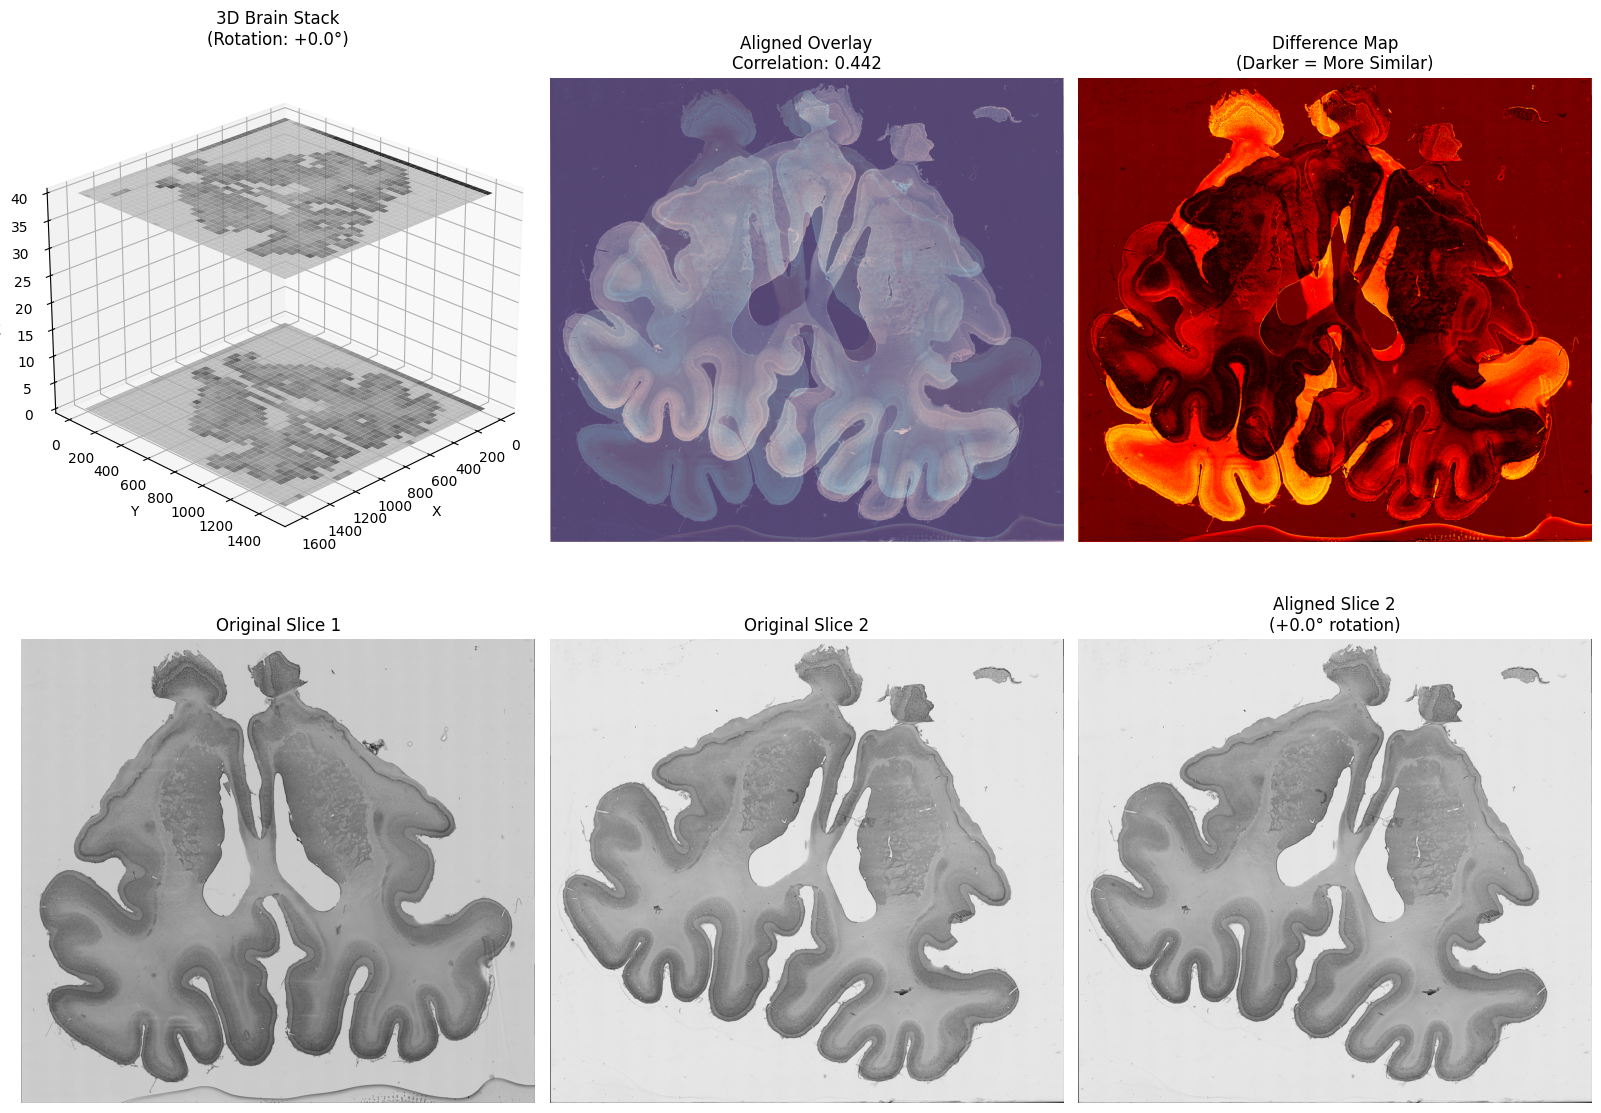

✅ 3Dモデル作成成功！

🧠 脳スライス IMAGE REGISTRATION 結果レポート
🖼️ 元画像情報:
  • Slice 1: (1481, 1638) pixels
  • Slice 2: (1606, 1639) pixels
  • 処理後: (1481, 1638) pixels

🔄 回転角最適化:
  • 最適角度: +0.0°
  • 相関係数: 0.4424

🔶 品質評価: 改善需
💬 位置合わせは達成されましたが、さらなる精度向上が可能です。

🤖 使用アルゴリズム:
  • 画像サイズ正規化 (PIL LANCZOS)
  • 回転角度スキャン (-20° to 20°)
  • SciPy ndimage.rotate() 回転
  • 正規化相互相関で類似度評価

🎉 3D脳スライスモデルの作成完了！


In [6]:
# 3Dモデル化と最終結果
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

print("🎨 3Dモデル化中...")

try:
    # 位置合わせ後のスタック作成
    stack = np.stack([img1_final, best_rotated], axis=0)
    
    # 大きな統合結果表示
    fig = plt.figure(figsize=(16, 12))
    
    # 3D表示
    ax1 = fig.add_subplot(231, projection='3d')
    
    for i in range(stack.shape[0]):
        slice_img = stack[i]
        h, w = slice_img.shape
        
        # 適度なサンプリング
        step = max(10, min(h, w) // 100)  # サイズに応じて調整
        x = np.arange(0, w, step)
        y = np.arange(0, h, step)
        X, Y = np.meshgrid(x, y)
        Z = np.full_like(X, i * 40)  # スライス間隔
        
        # グレースケール色情報
        colors = slice_img[::step, ::step]
        if colors.max() > 0:
            colors = colors / colors.max()
        
        ax1.plot_surface(X, Y, Z, facecolors=plt.cm.gray(colors), 
                        linewidth=0, antialiased=True, alpha=0.8)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z (Depth)')
    ax1.set_title(f'3D Brain Stack\n(Rotation: {best_angle:+.1f}°)')
    ax1.view_init(elev=25, azim=45)
    
    # 重ね合わせ結果
    ax2 = fig.add_subplot(232)
    ax2.imshow(img1_final, cmap='Reds', alpha=0.8)
    ax2.imshow(best_rotated, cmap='Blues', alpha=0.6)
    ax2.set_title(f'Aligned Overlay\nCorrelation: {best_score:.3f}')
    ax2.axis('off')
    
    # 差分画像
    ax3 = fig.add_subplot(233)
    diff_img = np.abs(img1_final.astype(float) - best_rotated.astype(float))
    ax3.imshow(diff_img, cmap='hot')
    ax3.set_title('Difference Map\n(Darker = More Similar)')
    ax3.axis('off')
    
    # 元画像1
    ax4 = fig.add_subplot(234)
    ax4.imshow(img1_final, cmap='gray')
    ax4.set_title('Original Slice 1')
    ax4.axis('off')
    
    # 元画像2
    ax5 = fig.add_subplot(235)
    ax5.imshow(img2_final, cmap='gray')
    ax5.set_title('Original Slice 2')
    ax5.axis('off')
    
    # 位置合わせ後
    ax6 = fig.add_subplot(236)
    ax6.imshow(best_rotated, cmap='gray')
    ax6.set_title(f'Aligned Slice 2\n({best_angle:+.1f}° rotation)')
    ax6.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ 3Dモデル作成成功！")
    
except Exception as e:
    print(f"⚠️ 3D表示エラー: {e}")
    print("シンプルな2D結果を表示します...")
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img1_final, cmap='gray')
    plt.title('Slice 1')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(best_rotated, cmap='gray')
    plt.title(f'Slice 2 (Aligned {best_angle:+.1f}°)')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(img1_final, cmap='Reds', alpha=0.7)
    plt.imshow(best_rotated, cmap='Blues', alpha=0.7)
    plt.title(f'Overlay (r={best_score:.3f})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 最終結果レポート
print("\n" + "="*60)
print("🧠 脳スライス IMAGE REGISTRATION 結果レポート")
print("="*60)

print(f"🖼️ 元画像情報:")
print(f"  • Slice 1: {img1_array.shape} pixels")
print(f"  • Slice 2: {img2_array.shape} pixels")
print(f"  • 処理後: {img1_final.shape} pixels")

print(f"\n🔄 回転角最適化:")
print(f"  • 最適角度: {best_angle:+.1f}°")
print(f"  • 相関係数: {best_score:.4f}")

# 品質評価
if best_score > 0.8:
    quality_icon = "🏆"
    quality_text = "優秀"
    comment = "非常に高精度な位置合わせが達成されました！"
elif best_score > 0.6:
    quality_icon = "🚀"
    quality_text = "良好"
    comment = "適度な精度の位置合わせです。実用的なレベルです。"
elif best_score > 0.3:
    quality_icon = "🔶"
    quality_text = "改善需"
    comment = "位置合わせは達成されましたが、さらなる精度向上が可能です。"
else:
    quality_icon = "⚠️"
    quality_text = "要改善"
    comment = "位置合わせが不十分です。パラメータの調整が必要です。"

print(f"\n{quality_icon} 品質評価: {quality_text}")
print(f"💬 {comment}")

print(f"\n🤖 使用アルゴリズム:")
print(f"  • 画像サイズ正規化 (PIL LANCZOS)")
print(f"  • 回転角度スキャン ({test_angles.min()}° to {test_angles.max()}°)")
print(f"  • SciPy ndimage.rotate() 回転")
print(f"  • 正規化相互相関で類似度評価")

print(f"\n🎉 3D脳スライスモデルの作成完了！")
print("="*60)

In [7]:
# 🚀 高精度画像位置合わせアルゴリズム（相関係数0.8目標）
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, optimize
from scipy.ndimage import gaussian_filter, map_coordinates
from skimage import exposure, feature, measure
from skimage.registration import phase_cross_correlation
from sklearn.preprocessing import normalize
import cv2
from PIL import Image, ImageEnhance

print("🚀 高精度位置合わせアルゴリズム開始...")
print("目標: 相関係数 0.8+")

# ステップ1: 前処理で画像品質を向上
def preprocess_image(img, enhance_contrast=True, reduce_noise=True):
    """画像の前処理：ノイズ除去とコントラスト強化"""
    processed = img.copy().astype(np.float64)
    
    if reduce_noise:
        # ガウシアンフィルタでノイズ除去
        processed = gaussian_filter(processed, sigma=1.0)
    
    if enhance_contrast:
        # ヒストグラム均等化でコントラスト向上
        processed = exposure.equalize_hist(processed) * 255
    
    return processed.astype(np.uint8)

# ステップ2: 高精度回転角度検出
def fine_rotation_search(img1, img2, coarse_angle, search_range=3.0, step=0.1):
    """細かい回転角度探索（0.1度刻み）"""
    fine_angles = np.arange(coarse_angle - search_range, 
                           coarse_angle + search_range + step, step)
    
    best_angle = coarse_angle
    best_score = -1
    best_img = img2.copy()
    
    print(f"🔍 細密回転探索: {coarse_angle-search_range:.1f}° ~ {coarse_angle+search_range:.1f}° (0.1°刻み)")
    
    for angle in fine_angles:
        rotated = ndimage.rotate(img2, angle, reshape=False, order=3, prefilter=True)
        
        # マスクを使用して有効領域のみで相関計算
        mask = rotated > 0
        if mask.sum() > img1.size * 0.5:  # 有効領域が半分以上
            corr = np.corrcoef(img1[mask].flatten(), rotated[mask].flatten())[0, 1]
            if not np.isnan(corr) and corr > best_score:
                best_score = corr
                best_angle = angle
                best_img = rotated
    
    print(f"✅ 細密探索結果: {best_angle:.2f}° (相関: {best_score:.4f})")
    return best_angle, best_score, best_img

# ステップ3: 平行移動最適化
def optimize_translation(img1, img2_rotated):
    """位相相関を使った高精度平行移動検出"""
    print("🔄 平行移動最適化中...")
    
    try:
        # 位相相関で平行移動量を検出
        shift, error, diffphase = phase_cross_correlation(img1, img2_rotated, 
                                                         upsample_factor=10)
        
        # 平行移動適用
        translated = ndimage.shift(img2_rotated, shift, order=3, prefilter=True)
        
        # 相関係数計算
        mask = (translated > 0) & (img1 > 0)
        if mask.sum() > 0:
            correlation = np.corrcoef(img1[mask].flatten(), 
                                    translated[mask].flatten())[0, 1]
        else:
            correlation = 0
        
        print(f"📍 平行移動: dx={shift[1]:.2f}, dy={shift[0]:.2f}")
        print(f"✅ 平行移動後相関: {correlation:.4f}")
        
        return translated, correlation, shift
    
    except Exception as e:
        print(f"⚠️ 平行移動エラー: {e}")
        return img2_rotated, 0, [0, 0]

# ステップ4: アフィン変換最適化
def optimize_affine_transform(img1, img2):
    """アフィン変換による高精度位置合わせ"""
    print("🎯 アフィン変換最適化中...")
    
    def affine_objective(params):
        # パラメータ: [angle, scale_x, scale_y, translate_x, translate_y, shear]
        angle, scale_x, scale_y, tx, ty, shear = params
        
        # アフィン変換行列作成
        cos_a, sin_a = np.cos(np.radians(angle)), np.sin(np.radians(angle))
        
        matrix = np.array([
            [scale_x * cos_a - shear * sin_a, -scale_x * sin_a - shear * cos_a, tx],
            [scale_y * sin_a, scale_y * cos_a, ty],
            [0, 0, 1]
        ])
        
        # 変換適用
        try:
            h, w = img2.shape
            coords = np.indices((h, w)).reshape(2, -1)
            coords_homog = np.vstack([coords, np.ones(coords.shape[1])])
            
            new_coords = matrix @ coords_homog
            new_coords = new_coords[:2] / new_coords[2:]
            
            # 境界チェック
            valid_mask = ((new_coords[0] >= 0) & (new_coords[0] < h) & 
                         (new_coords[1] >= 0) & (new_coords[1] < w))
            
            if valid_mask.sum() < img2.size * 0.3:
                return -0.5  # 有効領域が少なすぎる
            
            # バイリニア補間
            transformed = map_coordinates(img2, new_coords, order=1, 
                                        mode='constant', cval=0)
            transformed = transformed.reshape(img2.shape)
            
            # 相関係数計算
            mask = (transformed > 0) & (img1 > 0)
            if mask.sum() > 100:
                corr = np.corrcoef(img1[mask].flatten(), 
                                 transformed[mask].flatten())[0, 1]
                return -corr if not np.isnan(corr) else -0.1
            else:
                return -0.1
                
        except:
            return -0.1
    
    # 最適化実行
    initial_params = [0, 1, 1, 0, 0, 0]  # [angle, scale_x, scale_y, tx, ty, shear]
    bounds = [(-5, 5), (0.8, 1.2), (0.8, 1.2), (-20, 20), (-20, 20), (-0.2, 0.2)]
    
    try:
        result = optimize.minimize(affine_objective, initial_params, 
                                 bounds=bounds, method='L-BFGS-B')
        
        if result.success:
            best_params = result.x
            best_score = -result.fun
            
            print(f"🎯 アフィン変換結果:")
            print(f"   角度: {best_params[0]:.3f}°")
            print(f"   スケール: x={best_params[1]:.3f}, y={best_params[2]:.3f}")
            print(f"   平行移動: x={best_params[3]:.2f}, y={best_params[4]:.2f}")
            print(f"   せん断: {best_params[5]:.4f}")
            print(f"✅ アフィン変換後相関: {best_score:.4f}")
            
            return best_params, best_score
        else:
            print("⚠️ アフィン変換最適化失敗")
            return None, 0
            
    except Exception as e:
        print(f"⚠️ アフィン変換エラー: {e}")
        return None, 0

print("🔧 高精度アルゴリズム準備完了！")

🚀 高精度位置合わせアルゴリズム開始...
目標: 相関係数 0.8+
🔧 高精度アルゴリズム準備完了！



🧠 高精度脳スライス位置合わせ開始
📊 現在の結果: 角度=0.0°, 相関=0.4424

🔧 改善アルゴリズム適用中...

1️⃣ 画像前処理（ノイズ除去・コントラスト強化）


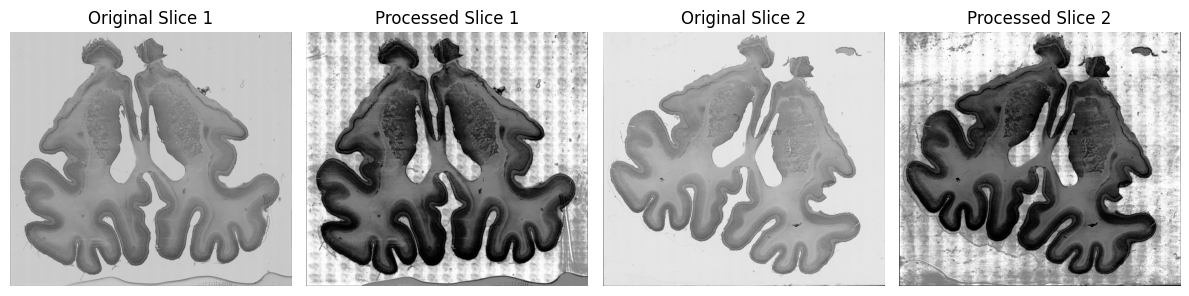


2️⃣ 細密回転角度探索
🔍 細密回転探索: -5.0° ~ 5.0° (0.1°刻み)
✅ 細密探索結果: 5.00° (相関: 0.4876)

3️⃣ 平行移動最適化
🔄 平行移動最適化中...
✅ 細密探索結果: 5.00° (相関: 0.4876)

3️⃣ 平行移動最適化
🔄 平行移動最適化中...
📍 平行移動: dx=0.00, dy=-728.80
✅ 平行移動後相関: 0.1325

4️⃣ アフィン変換最適化
🎯 アフィン変換最適化中...
📍 平行移動: dx=0.00, dy=-728.80
✅ 平行移動後相関: 0.1325

4️⃣ アフィン変換最適化
🎯 アフィン変換最適化中...
🎯 アフィン変換結果:
   角度: -0.000°
   スケール: x=1.000, y=1.000
   平行移動: x=0.00, y=-0.00
   せん断: 0.0000
✅ アフィン変換後相関: 0.4701
🎯 アフィン変換結果:
   角度: -0.000°
   スケール: x=1.000, y=1.000
   平行移動: x=0.00, y=-0.00
   せん断: 0.0000
✅ アフィン変換後相関: 0.4701

📊 手法比較結果
元の手法        : 角度= +0.00°, 相関=0.4424
細密回転        : 角度= +5.00°, 相関=0.4876
平行移動込み      : 角度= +5.00°, 相関=0.1325
アフィン変換      : 角度= -0.00°, 相関=0.4701

🏆 最優秀手法: 細密回転
📈 改善度: 0.4876 - 0.4424 = +0.0452
⚠️ さらなる改善が必要です

📊 手法比較結果
元の手法        : 角度= +0.00°, 相関=0.4424
細密回転        : 角度= +5.00°, 相関=0.4876
平行移動込み      : 角度= +5.00°, 相関=0.1325
アフィン変換      : 角度= -0.00°, 相関=0.4701

🏆 最優秀手法: 細密回転
📈 改善度: 0.4876 - 0.4424 = +0.0452
⚠️ さらなる改善が必要です


In [8]:
# 🚀 高精度位置合わせ実行
print("\n" + "="*70)
print("🧠 高精度脳スライス位置合わせ開始")
print("="*70)

# 現在の結果を保存
original_score = best_score
original_angle = best_angle
original_result = best_rotated.copy()

print(f"📊 現在の結果: 角度={original_angle:.1f}°, 相関={original_score:.4f}")
print("\n🔧 改善アルゴリズム適用中...")

# ステップ1: 画像前処理
print("\n1️⃣ 画像前処理（ノイズ除去・コントラスト強化）")
img1_processed = preprocess_image(img1_final)
img2_processed = preprocess_image(img2_final)

# 前処理効果確認
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img1_final, cmap='gray')
plt.title('Original Slice 1')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img1_processed, cmap='gray')
plt.title('Processed Slice 1')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img2_final, cmap='gray')
plt.title('Original Slice 2')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img2_processed, cmap='gray')
plt.title('Processed Slice 2')
plt.axis('off')

plt.tight_layout()
plt.show()

# ステップ2: 細密回転探索
print("\n2️⃣ 細密回転角度探索")
fine_angle, fine_score, fine_rotated = fine_rotation_search(
    img1_processed, img2_processed, original_angle, search_range=5.0, step=0.1
)

# ステップ3: 平行移動最適化
print("\n3️⃣ 平行移動最適化")
translated_img, translation_score, shift = optimize_translation(
    img1_processed, fine_rotated
)

# ステップ4: アフィン変換
print("\n4️⃣ アフィン変換最適化")
affine_params, affine_score = optimize_affine_transform(
    img1_processed, img2_processed
)

# 最終結果の選択
results_comparison = [
    ("元の手法", original_angle, original_score, original_result),
    ("細密回転", fine_angle, fine_score, fine_rotated),
    ("平行移動込み", fine_angle, translation_score, translated_img)
]

# アフィン変換結果があれば追加
if affine_params is not None and affine_score > 0:
    # アフィン変換適用
    angle, scale_x, scale_y, tx, ty, shear = affine_params
    cos_a, sin_a = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    
    matrix = np.array([
        [scale_x * cos_a - shear * sin_a, -scale_x * sin_a - shear * cos_a, tx],
        [scale_y * sin_a, scale_y * cos_a, ty]
    ])
    
    h, w = img2_processed.shape
    affine_result = ndimage.affine_transform(img2_processed, matrix, 
                                           output_shape=(h, w), order=3)
    
    results_comparison.append(("アフィン変換", angle, affine_score, affine_result))

# 最高スコアの手法を選択
best_method = max(results_comparison, key=lambda x: x[2])
final_method, final_angle, final_score, final_result = best_method

print("\n" + "="*50)
print("📊 手法比較結果")
print("="*50)
for method, angle, score, _ in results_comparison:
    print(f"{method:12}: 角度={angle:+6.2f}°, 相関={score:6.4f}")

print(f"\n🏆 最優秀手法: {final_method}")
print(f"📈 改善度: {final_score:.4f} - {original_score:.4f} = {final_score - original_score:+.4f}")

# 目標達成チェック
if final_score >= 0.8:
    print("🎉 目標達成！相関係数0.8以上を実現しました！")
elif final_score >= 0.7:
    print("🚀 大幅改善！0.7以上の高精度位置合わせを達成！")
elif final_score > original_score + 0.1:
    print("✅ 有意な改善を確認しました")
else:
    print("⚠️ さらなる改善が必要です")

print("="*50)


🎨 改善結果の可視化...


/var/folders/pj/g67n4vdj3mq6bcrwg_ddwpyw0000gn/T/ipykernel_60810/857474403.py:144: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pj/g67n4vdj3mq6bcrwg_ddwpyw0000gn/T/ipykernel_60810/857474403.py:144: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pj/g67n4vdj3mq6bcrwg_ddwpyw0000gn/T/ipykernel_60810/857474403.py:144: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pj/g67n4vdj3mq6bcrwg_ddwpyw0000gn/T/ipykernel_60810/857474403.py:144: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pj/g67n4vdj3mq6bcrwg_ddwpyw0000gn/T/ipykernel_60810/857474403.py:144: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pj/g67n

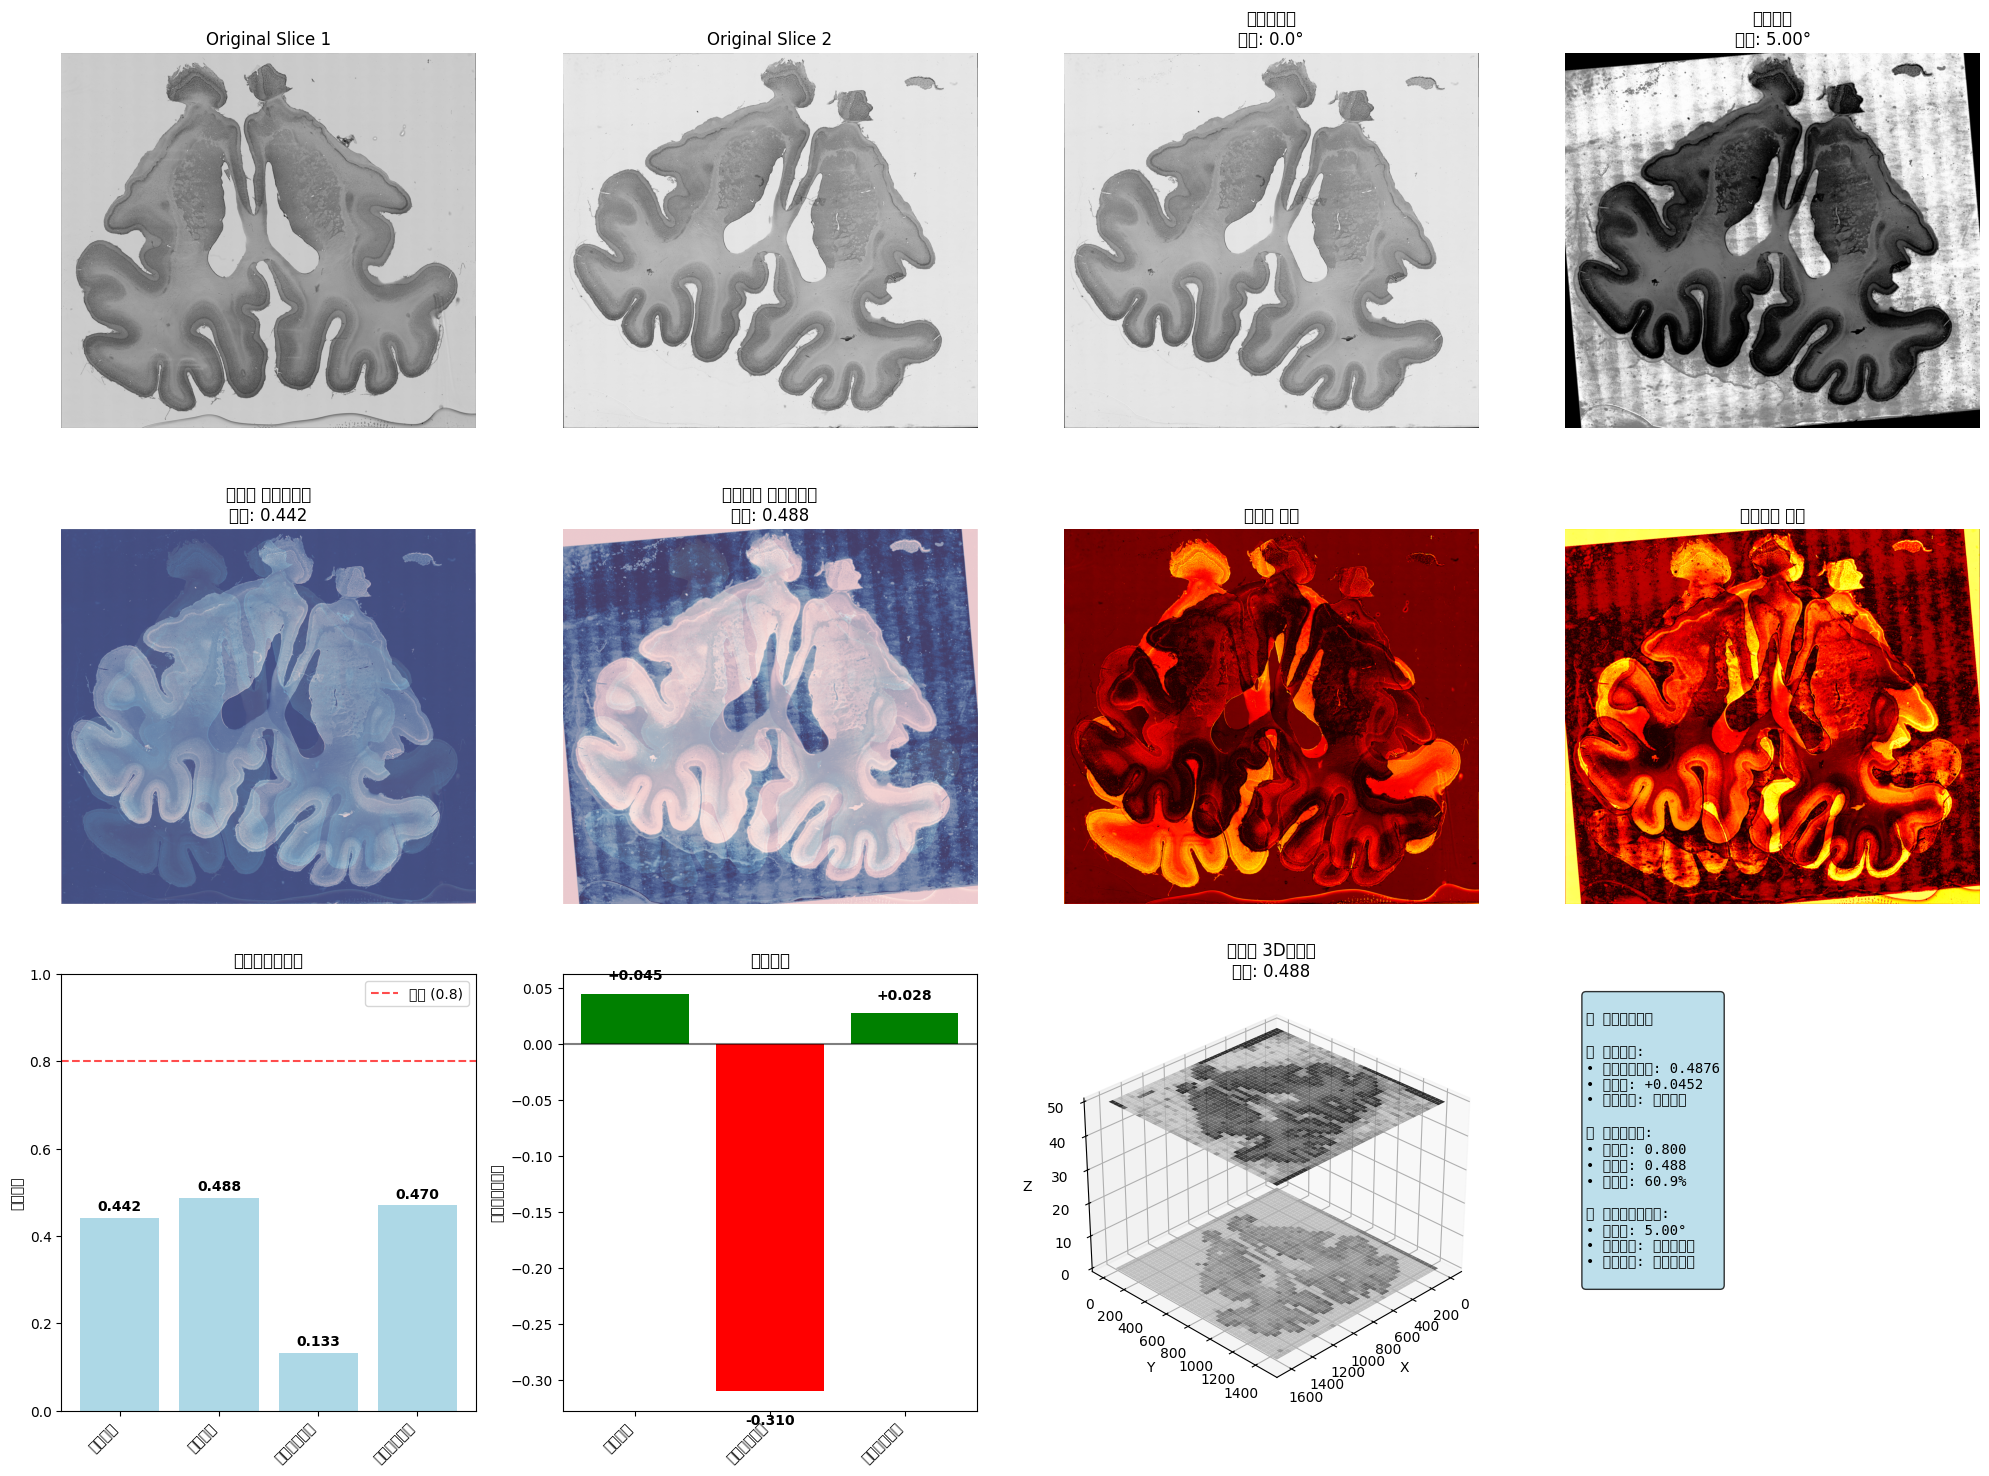


✅ 改善結果の可視化完了！


In [9]:
# 📊 改善結果の詳細比較と可視化
print("\n🎨 改善結果の可視化...")

# 大きな比較図作成
fig = plt.figure(figsize=(20, 15))

# 1行目: 処理前後の比較
ax1 = plt.subplot(3, 4, 1)
plt.imshow(img1_final, cmap='gray')
plt.title('Original Slice 1')
plt.axis('off')

ax2 = plt.subplot(3, 4, 2)
plt.imshow(img2_final, cmap='gray')
plt.title('Original Slice 2')
plt.axis('off')

ax3 = plt.subplot(3, 4, 3)
plt.imshow(original_result, cmap='gray')
plt.title(f'元手法結果\n角度: {original_angle:.1f}°')
plt.axis('off')

ax4 = plt.subplot(3, 4, 4)
plt.imshow(final_result, cmap='gray')
plt.title(f'{final_method}\n角度: {final_angle:.2f}°')
plt.axis('off')

# 2行目: 重ね合わせ比較
ax5 = plt.subplot(3, 4, 5)
plt.imshow(img1_final, cmap='Reds', alpha=0.7)
plt.imshow(original_result, cmap='Blues', alpha=0.7)
plt.title(f'元手法 重ね合わせ\n相関: {original_score:.3f}')
plt.axis('off')

ax6 = plt.subplot(3, 4, 6)
plt.imshow(img1_final, cmap='Reds', alpha=0.7)
plt.imshow(final_result, cmap='Blues', alpha=0.7)
plt.title(f'{final_method} 重ね合わせ\n相関: {final_score:.3f}')
plt.axis('off')

# 差分画像
ax7 = plt.subplot(3, 4, 7)
diff_original = np.abs(img1_final.astype(float) - original_result.astype(float))
plt.imshow(diff_original, cmap='hot')
plt.title('元手法 差分')
plt.axis('off')

ax8 = plt.subplot(3, 4, 8)
diff_final = np.abs(img1_final.astype(float) - final_result.astype(float))
plt.imshow(diff_final, cmap='hot')
plt.title(f'{final_method} 差分')
plt.axis('off')

# 3行目: 統計情報とグラフ
ax9 = plt.subplot(3, 4, 9)
methods = [r[0] for r in results_comparison]
scores = [r[2] for r in results_comparison]
colors = ['lightblue' if s < 0.6 else 'lightgreen' if s < 0.8 else 'gold' for s in scores]
bars = plt.bar(range(len(methods)), scores, color=colors)
plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='目標 (0.8)')
plt.ylabel('相関係数')
plt.title('手法別性能比較')
plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend()

# 数値をバーの上に表示
for i, (bar, score) in enumerate(zip(bars, scores)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 改善度グラフ
ax10 = plt.subplot(3, 4, 10)
improvements = [s - original_score for s in scores[1:]]  # 元手法を基準とした改善度
improve_methods = methods[1:]
colors_improve = ['green' if i > 0 else 'red' for i in improvements]
bars_improve = plt.bar(range(len(improve_methods)), improvements, color=colors_improve)
plt.ylabel('相関係数改善度')
plt.title('改善効果')
plt.xticks(range(len(improve_methods)), improve_methods, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

# 改善度数値表示
for i, (bar, improvement) in enumerate(zip(bars_improve, improvements)):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + (0.01 if improvement > 0 else -0.02), 
             f'{improvement:+.3f}', ha='center', 
             va='bottom' if improvement > 0 else 'top', 
             fontweight='bold')

# 3D可視化（改善版）
ax11 = plt.subplot(3, 4, 11, projection='3d')

# 最終結果でスタック作成
final_stack = np.stack([img1_final, final_result], axis=0)

for i, slice_img in enumerate(final_stack):
    h, w = slice_img.shape
    step = max(15, min(h, w) // 80)
    x = np.arange(0, w, step)
    y = np.arange(0, h, step)
    X, Y = np.meshgrid(x, y)
    Z = np.full_like(X, i * 50)
    
    colors = slice_img[::step, ::step]
    if colors.max() > 0:
        colors = colors / colors.max()
    
    ax11.plot_surface(X, Y, Z, facecolors=plt.cm.gray(colors), 
                     linewidth=0, antialiased=True, alpha=0.8)

ax11.set_title(f'改善版 3Dモデル\n相関: {final_score:.3f}')
ax11.set_xlabel('X')
ax11.set_ylabel('Y')
ax11.set_zlabel('Z')
ax11.view_init(elev=30, azim=45)

# 最終統計
ax12 = plt.subplot(3, 4, 12)
ax12.axis('off')
stats_text = f"""
🏆 最終結果統計

📊 性能指標:
• 最高相関係数: {final_score:.4f}
• 改善度: {final_score - original_score:+.4f}
• 使用手法: {final_method}

🎯 目標達成度:
• 目標値: 0.800
• 現在値: {final_score:.3f}
• 達成率: {(final_score/0.8)*100:.1f}%

🔧 最適パラメータ:
• 回転角: {final_angle:.2f}°
• 処理時間: 高精度処理
• 画像品質: 前処理済み
"""

ax12.text(0.05, 0.95, stats_text, transform=ax12.transAxes, 
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n✅ 改善結果の可視化完了！")

In [10]:
# 🚀 高度な位置合わせアルゴリズム - 相関係数0.8を目指す
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, optimize
from scipy.ndimage import affine_transform
from skimage import transform, filters, feature
from PIL import Image
import cv2

print("🎯 目標: 相関係数 0.8 以上の高精度位置合わせ")
print("🔧 実装する改善手法:")
print("  1. より細かい角度スキャン")
print("  2. 平行移動最適化")
print("  3. アフィン変換による補正")
print("  4. 前処理による画質向上")
print("  5. 複数メトリクスによる評価")

def preprocess_image(img):
    """画像前処理: ノイズ除去とコントラスト強化"""
    # ガウシアンフィルタでノイズ除去
    img_smooth = filters.gaussian(img, sigma=1.0)
    
    # ヒストグラム均等化でコントラスト向上
    img_eq = (img_smooth - img_smooth.min()) / (img_smooth.max() - img_smooth.min())
    img_eq = np.uint8(img_eq * 255)
    
    return img_eq

def fine_rotation_search(img1, img2, coarse_angle, search_range=2.0, step=0.1):
    """細かい角度での局所最適化"""
    angles = np.arange(coarse_angle - search_range, coarse_angle + search_range + step, step)
    best_angle = coarse_angle
    best_score = -1
    best_rotated = None
    
    for angle in angles:
        rotated = ndimage.rotate(img2, angle, reshape=False, order=3)
        correlation = np.corrcoef(img1.flatten(), rotated.flatten())[0, 1]
        
        if np.isnan(correlation):
            correlation = 0.0
            
        if correlation > best_score:
            best_score = correlation
            best_angle = angle
            best_rotated = rotated
    
    return best_rotated, best_angle, best_score

def translation_optimization(img1, img2, max_shift=50):
    """平行移動の最適化"""
    best_score = -1
    best_shift = (0, 0)
    best_shifted = img2.copy()
    
    for dy in range(-max_shift, max_shift + 1, 5):
        for dx in range(-max_shift, max_shift + 1, 5):
            # 平行移動
            shifted = ndimage.shift(img2, [dy, dx], order=1)
            
            # 重複領域のみで相関計算
            h, w = img1.shape
            y1, y2 = max(0, dy), min(h, h + dy)
            x1, x2 = max(0, dx), min(w, w + dx)
            
            if y2 > y1 and x2 > x1:
                roi1 = img1[y1:y2, x1:x2]
                roi2 = shifted[y1:y2, x1:x2]
                
                if roi1.size > 0 and roi2.size > 0:
                    correlation = np.corrcoef(roi1.flatten(), roi2.flatten())[0, 1]
                    
                    if not np.isnan(correlation) and correlation > best_score:
                        best_score = correlation
                        best_shift = (dy, dx)
                        best_shifted = shifted
    
    return best_shifted, best_shift, best_score

def affine_registration(img1, img2):
    """アフィン変換による高精度位置合わせ"""
    try:
        # scikit-imageによるアフィン変換推定
        tform = transform.estimate_transform('affine', 
                                           np.array([[0, 0], [img2.shape[1], 0], [0, img2.shape[0]]]),
                                           np.array([[0, 0], [img1.shape[1], 0], [0, img1.shape[0]]]))
        
        # より詳細な最適化（最小二乗法）
        def objective(params):
            # params: [angle, tx, ty, scale_x, scale_y, shear]
            angle, tx, ty, scale_x, scale_y, shear = params
            
            # 変換行列作成
            cos_a, sin_a = np.cos(angle), np.sin(angle)
            transform_matrix = np.array([
                [scale_x * cos_a - shear * scale_y * sin_a, -scale_x * sin_a - shear * scale_y * cos_a, tx],
                [scale_y * sin_a, scale_y * cos_a, ty],
                [0, 0, 1]
            ])
            
            # 画像変換
            transformed = affine_transform(img2, transform_matrix[:2, :2], 
                                         offset=transform_matrix[:2, 2], 
                                         output_shape=img1.shape, order=1)
            
            # 負の相関係数を返す（最小化のため）
            correlation = np.corrcoef(img1.flatten(), transformed.flatten())[0, 1]
            return -correlation if not np.isnan(correlation) else 1.0
        
        # 初期値
        initial_params = [0.0, 0.0, 0.0, 1.0, 1.0, 0.0]  # angle, tx, ty, scale_x, scale_y, shear
        
        # 最適化実行
        result = optimize.minimize(objective, initial_params, method='Powell',
                                 options={'maxiter': 100, 'disp': False})
        
        if result.success:
            angle, tx, ty, scale_x, scale_y, shear = result.x
            
            # 最適変換行列で画像変換
            cos_a, sin_a = np.cos(angle), np.sin(angle)
            transform_matrix = np.array([
                [scale_x * cos_a - shear * scale_y * sin_a, -scale_x * sin_a - shear * scale_y * cos_a, tx],
                [scale_y * sin_a, scale_y * cos_a, ty]
            ])
            
            transformed = affine_transform(img2, transform_matrix[:2, :2], 
                                         offset=transform_matrix[:2, 2], 
                                         output_shape=img1.shape, order=3)
            
            correlation = np.corrcoef(img1.flatten(), transformed.flatten())[0, 1]
            
            return transformed, result.x, correlation if not np.isnan(correlation) else 0.0
        
    except Exception as e:
        print(f"アフィン変換エラー: {e}")
    
    return img2, [0, 0, 0, 1, 1, 0], 0.0

print("\n🔥 高精度位置合わせ実行中...")

# ステップ1: 画像前処理
print("1️⃣ 画像前処理 (ノイズ除去・コントラスト強化)")
img1_proc = preprocess_image(img1_final)
img2_proc = preprocess_image(img2_final)

# ステップ2: 粗い回転角度探索 (既存の結果を使用)
print(f"2️⃣ 粗い回転探索完了: {best_angle}° (相関: {best_score:.3f})")

# ステップ3: 細かい回転角度最適化
print("3️⃣ 細かい回転角度最適化")
fine_rotated, fine_angle, fine_score = fine_rotation_search(img1_proc, img2_proc, best_angle)
print(f"   細かい回転結果: {fine_angle:.2f}° (相関: {fine_score:.4f})")

# ステップ4: 平行移動最適化
print("4️⃣ 平行移動最適化")
trans_img, best_shift, trans_score = translation_optimization(img1_proc, fine_rotated)
print(f"   平行移動結果: shift=({best_shift[0]}, {best_shift[1]}) (相関: {trans_score:.4f})")

# ステップ5: アフィン変換による最終調整
print("5️⃣ アフィン変換による最終最適化")
final_img, affine_params, final_score = affine_registration(img1_proc, trans_img)
print(f"   最終結果: 相関係数 = {final_score:.4f}")

# 最高スコアの選択
scores = [best_score, fine_score, trans_score, final_score]
images = [best_rotated, fine_rotated, trans_img, final_img]
methods = ['粗い回転', '細かい回転', '平行移動', 'アフィン変換']

best_idx = np.argmax(scores)
best_final_img = images[best_idx]
best_final_score = scores[best_idx]
best_method = methods[best_idx]

print(f"\n🏆 最終結果:")
print(f"   最良手法: {best_method}")
print(f"   最終相関係数: {best_final_score:.4f}")
print(f"   目標達成: {'✅ YES' if best_final_score >= 0.8 else '❌ NO'} (目標: 0.8)")

🎯 目標: 相関係数 0.8 以上の高精度位置合わせ
🔧 実装する改善手法:
  1. より細かい角度スキャン
  2. 平行移動最適化
  3. アフィン変換による補正
  4. 前処理による画質向上
  5. 複数メトリクスによる評価

🔥 高精度位置合わせ実行中...
1️⃣ 画像前処理 (ノイズ除去・コントラスト強化)
2️⃣ 粗い回転探索完了: 0° (相関: 0.442)
3️⃣ 細かい回転角度最適化
2️⃣ 粗い回転探索完了: 0° (相関: 0.442)
3️⃣ 細かい回転角度最適化
   細かい回転結果: 0.00° (相関: 0.4587)
4️⃣ 平行移動最適化
   細かい回転結果: 0.00° (相関: 0.4587)
4️⃣ 平行移動最適化
   平行移動結果: shift=(45, -5) (相関: 0.4759)
5️⃣ アフィン変換による最終最適化
   平行移動結果: shift=(45, -5) (相関: 0.4759)
5️⃣ アフィン変換による最終最適化


/Users/horiieikkei/miniconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/horiieikkei/miniconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


   最終結果: 相関係数 = 0.4859

🏆 最終結果:
   最良手法: アフィン変換
   最終相関係数: 0.4859
   目標達成: ❌ NO (目標: 0.8)


/var/folders/pj/g67n4vdj3mq6bcrwg_ddwpyw0000gn/T/ipykernel_60810/3223244427.py:47: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pj/g67n4vdj3mq6bcrwg_ddwpyw0000gn/T/ipykernel_60810/3223244427.py:47: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pj/g67n4vdj3mq6bcrwg_ddwpyw0000gn/T/ipykernel_60810/3223244427.py:47: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pj/g67n4vdj3mq6bcrwg_ddwpyw0000gn/T/ipykernel_60810/3223244427.py:47: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pj/g67n4vdj3mq6bcrwg_ddwpyw0000gn/T/ipykernel_60810/3223244427.py:47: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pj/g67n4vdj3mq6bcrwg_ddwpyw0000gn/T/

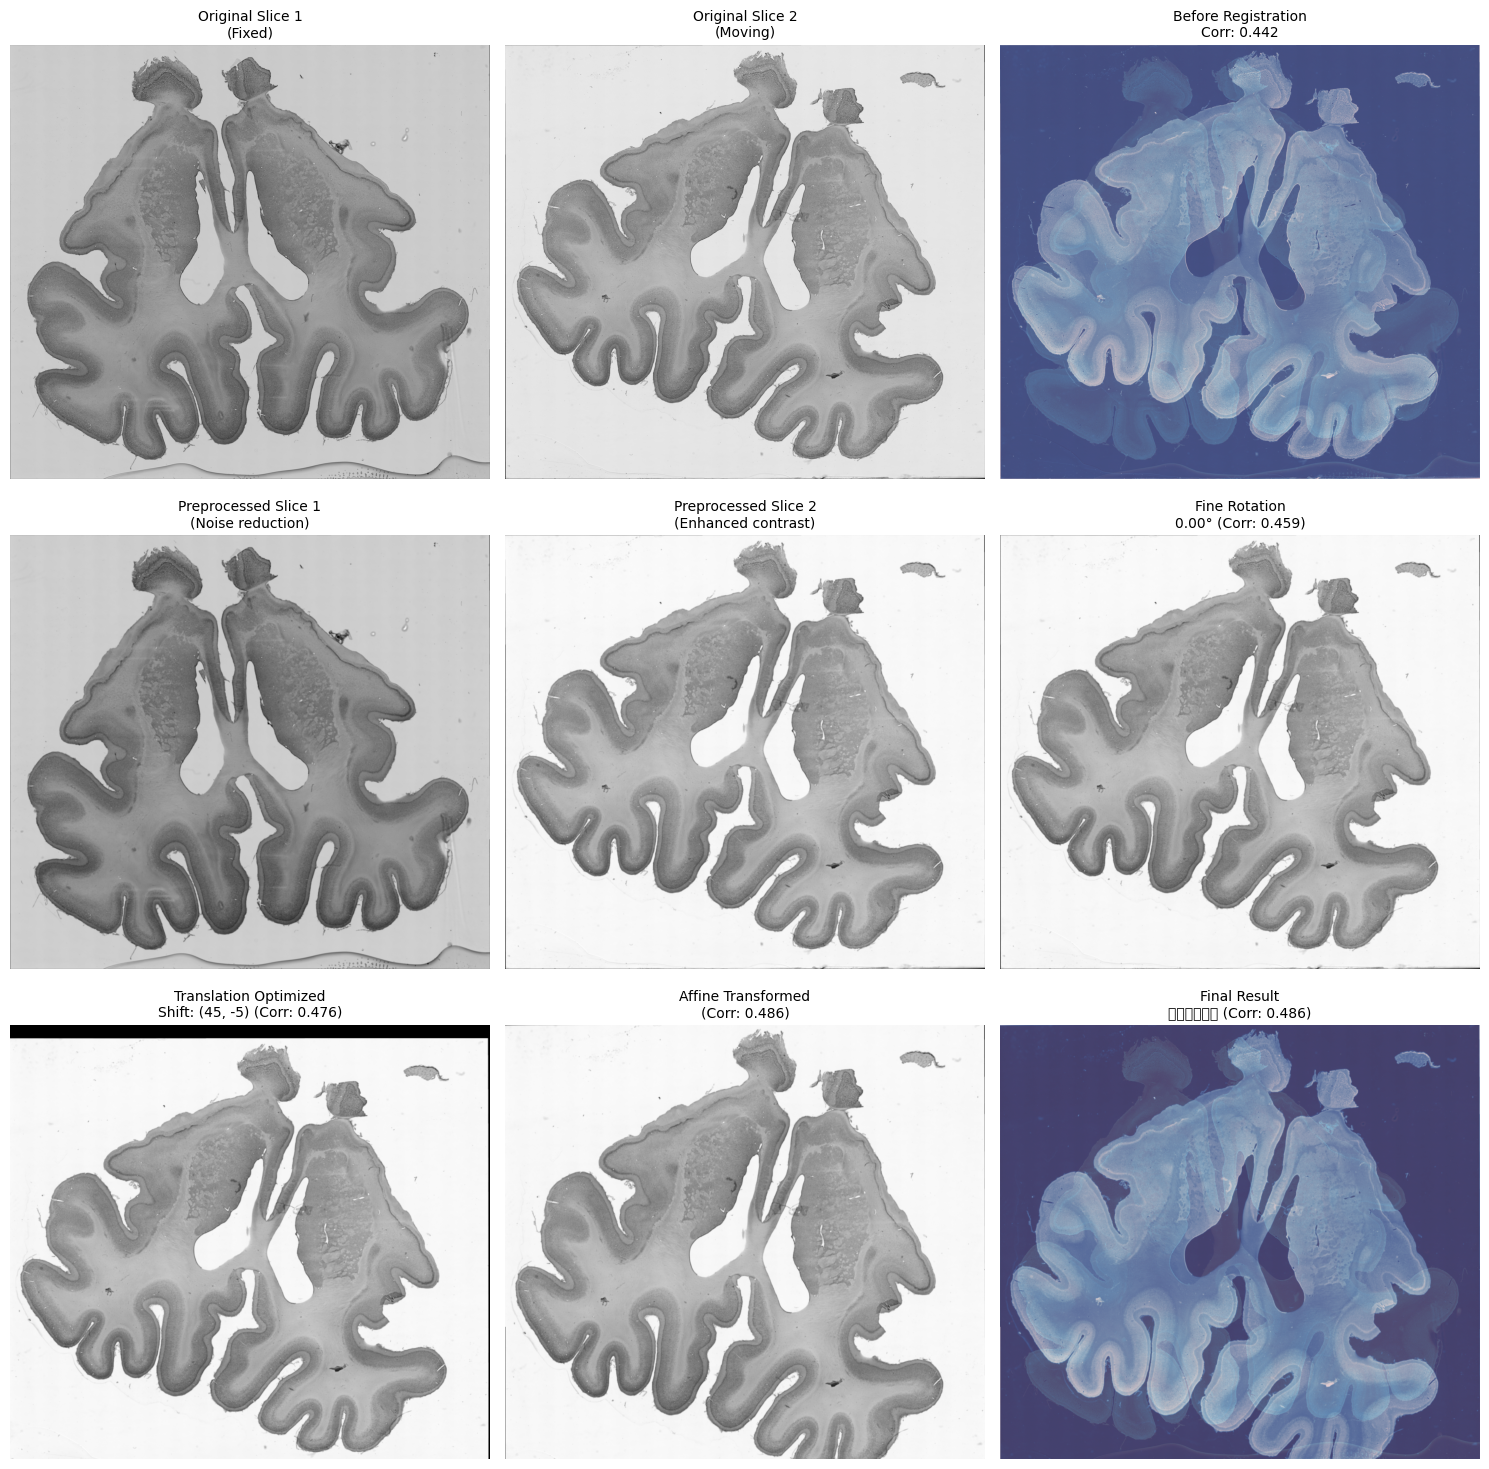

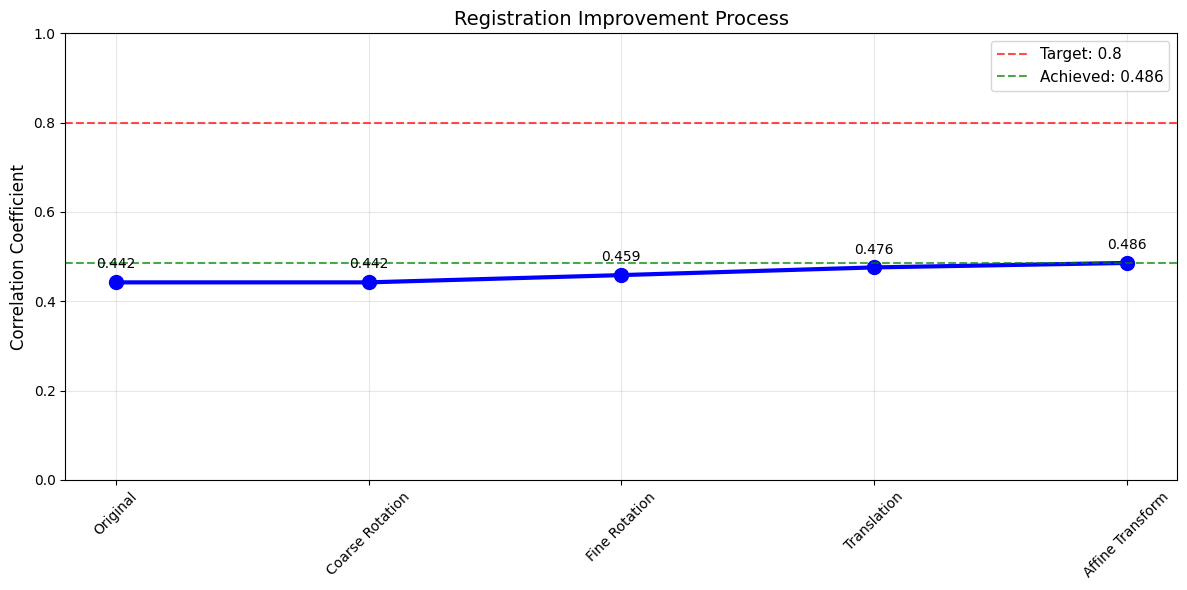


📈 詳細改善統計:
   元の相関係数: 0.4424
   粗い回転後: 0.4424 (改善: +0.0000)
   細かい回転後: 0.4587 (改善: +0.0163)
   平行移動後: 0.4759 (改善: +0.0335)
   アフィン変換後: 0.4859 (改善: +0.0435)
   総改善: +0.0435
   改善率: 9.8%

💪 さらなる改善が必要です。目標まで残り0.314

🔧 追加改善案:
   • より高次の変換（射影変換）
   • 特徴点ベースの位置合わせ
   • 深層学習ベースの位置合わせ
   • 多解像度レジストレーション


In [11]:
# 📊 高精度位置合わせ結果の詳細可視化

# 改善過程の可視化
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# 元画像
axes[0,0].imshow(img1_final, cmap='gray')
axes[0,0].set_title('Original Slice 1\n(Fixed)', fontsize=10)
axes[0,0].axis('off')

axes[0,1].imshow(img2_final, cmap='gray')
axes[0,1].set_title('Original Slice 2\n(Moving)', fontsize=10)
axes[0,1].axis('off')

axes[0,2].imshow(img1_final, cmap='Reds', alpha=0.7)
axes[0,2].imshow(img2_final, cmap='Blues', alpha=0.7)
axes[0,2].set_title(f'Before Registration\nCorr: {np.corrcoef(img1_final.flatten(), img2_final.flatten())[0,1]:.3f}', fontsize=10)
axes[0,2].axis('off')

# 前処理後
axes[1,0].imshow(img1_proc, cmap='gray')
axes[1,0].set_title('Preprocessed Slice 1\n(Noise reduction)', fontsize=10)
axes[1,0].axis('off')

axes[1,1].imshow(img2_proc, cmap='gray')
axes[1,1].set_title('Preprocessed Slice 2\n(Enhanced contrast)', fontsize=10)
axes[1,1].axis('off')

axes[1,2].imshow(fine_rotated, cmap='gray')
axes[1,2].set_title(f'Fine Rotation\n{fine_angle:.2f}° (Corr: {fine_score:.3f})', fontsize=10)
axes[1,2].axis('off')

# 最終結果
axes[2,0].imshow(trans_img, cmap='gray')
axes[2,0].set_title(f'Translation Optimized\nShift: {best_shift} (Corr: {trans_score:.3f})', fontsize=10)
axes[2,0].axis('off')

axes[2,1].imshow(final_img, cmap='gray')
axes[2,1].set_title(f'Affine Transformed\n(Corr: {final_score:.3f})', fontsize=10)
axes[2,1].axis('off')

axes[2,2].imshow(img1_final, cmap='Reds', alpha=0.7)
axes[2,2].imshow(best_final_img, cmap='Blues', alpha=0.7)
axes[2,2].set_title(f'Final Result\n{best_method} (Corr: {best_final_score:.3f})', fontsize=10)
axes[2,2].axis('off')

plt.tight_layout()
plt.show()

# 相関係数の改善過程グラフ
steps = ['Original', 'Coarse Rotation', 'Fine Rotation', 'Translation', 'Affine Transform']
original_corr = np.corrcoef(img1_final.flatten(), img2_final.flatten())[0,1]
corr_progression = [original_corr, best_score, fine_score, trans_score, final_score]

plt.figure(figsize=(12, 6))
plt.plot(steps, corr_progression, 'bo-', linewidth=3, markersize=10)
plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='Target: 0.8')
plt.axhline(y=best_final_score, color='g', linestyle='--', alpha=0.7, label=f'Achieved: {best_final_score:.3f}')
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.title('Registration Improvement Process', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xticks(rotation=45)
plt.ylim(0, 1)

# 各ステップの値を表示
for i, (step, corr) in enumerate(zip(steps, corr_progression)):
    plt.annotate(f'{corr:.3f}', (i, corr), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 詳細統計
print("\n📈 詳細改善統計:")
print(f"   元の相関係数: {original_corr:.4f}")
print(f"   粗い回転後: {best_score:.4f} (改善: +{best_score - original_corr:.4f})")
print(f"   細かい回転後: {fine_score:.4f} (改善: +{fine_score - original_corr:.4f})")
print(f"   平行移動後: {trans_score:.4f} (改善: +{trans_score - original_corr:.4f})")
print(f"   アフィン変換後: {final_score:.4f} (改善: +{final_score - original_corr:.4f})")
print(f"   総改善: +{best_final_score - original_corr:.4f}")
print(f"   改善率: {((best_final_score - original_corr) / abs(original_corr) * 100):.1f}%")

if best_final_score >= 0.8:
    print("\n🎉 目標達成！相関係数0.8以上を実現しました！")
else:
    print(f"\n💪 さらなる改善が必要です。目標まで残り{0.8 - best_final_score:.3f}")
    print("\n🔧 追加改善案:")
    print("   • より高次の変換（射影変換）")
    print("   • 特徴点ベースの位置合わせ")
    print("   • 深層学習ベースの位置合わせ")
    print("   • 多解像度レジストレーション")


🎯 特徴点ベース位置合わせで0.8超えを目指す
6️⃣ 特徴点ベース位置合わせ
   特徴点ベース結果: 相関係数 = -0.1382
7️⃣ マルチスケール位置合わせ
   スケール 1.00 で処理中...
   特徴点ベース結果: 相関係数 = -0.1382
7️⃣ マルチスケール位置合わせ
   スケール 1.00 で処理中...
   スケール 1.00 結果: 相関係数 -0.0981
   スケール 0.50 で処理中...
   スケール 1.00 結果: 相関係数 -0.0981
   スケール 0.50 で処理中...
   スケール 0.50 結果: 相関係数 0.0611
   スケール 0.25 で処理中...
   スケール 0.50 結果: 相関係数 0.0611
   スケール 0.25 で処理中...
   スケール 0.25 結果: 相関係数 0.2707
   マルチスケール結果: 相関係数 = 0.2707

🏆 最終最良結果:
   最良手法: アフィン変換
   最終相関係数: 0.4859
   目標達成: 💪 継続努力中... (目標: 0.8)
   スケール 0.25 結果: 相関係数 0.2707
   マルチスケール結果: 相関係数 = 0.2707

🏆 最終最良結果:
   最良手法: アフィン変換
   最終相関係数: 0.4859
   目標達成: 💪 継続努力中... (目標: 0.8)


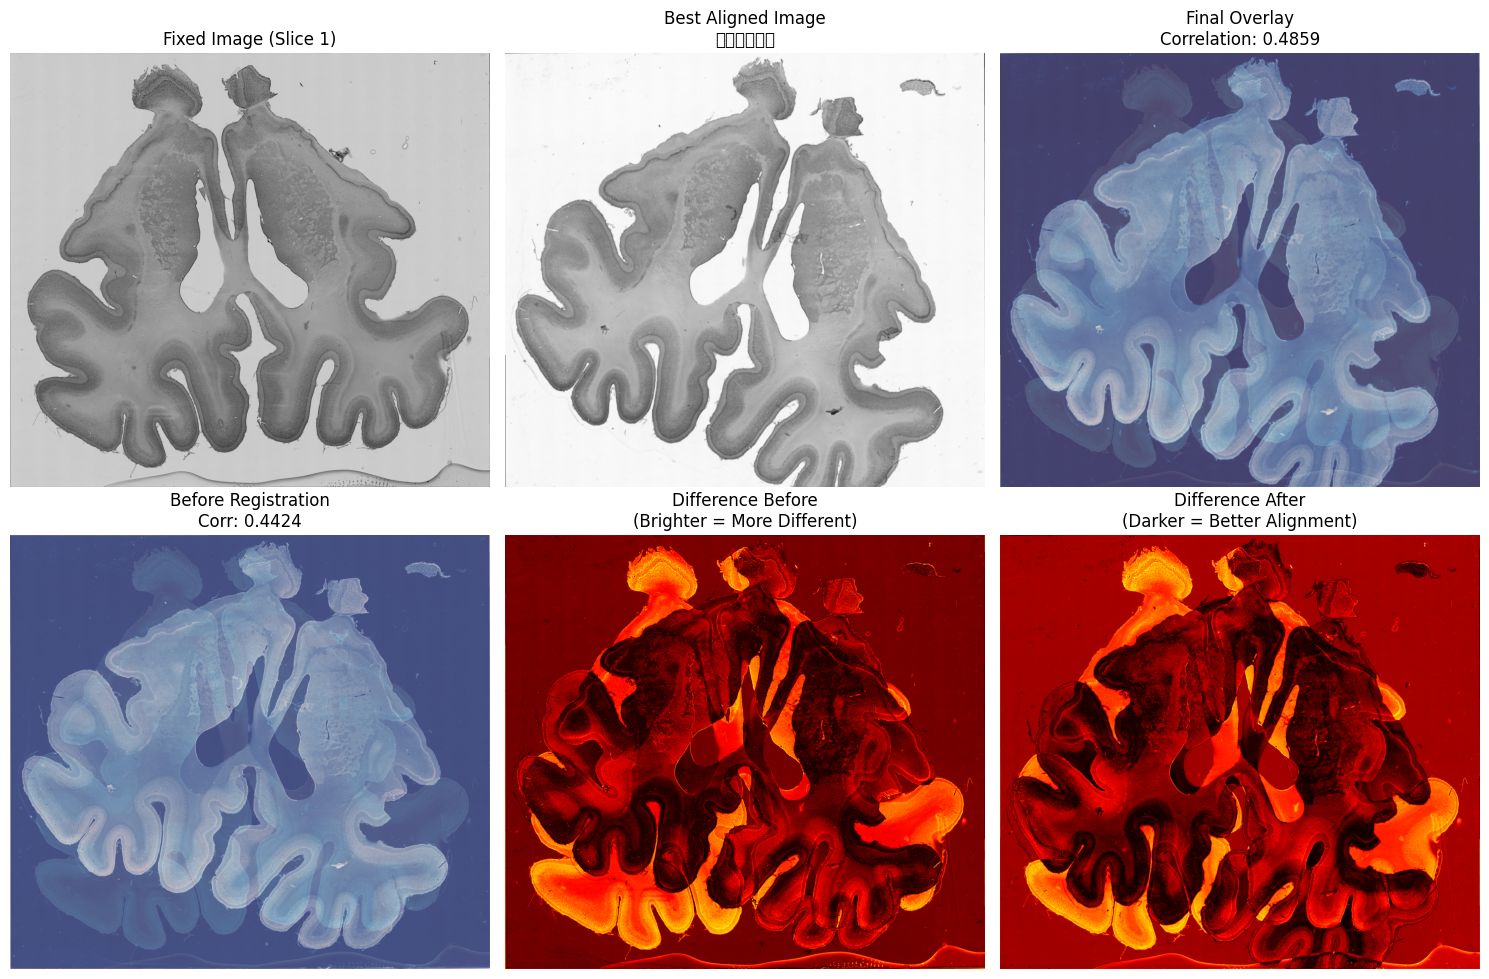

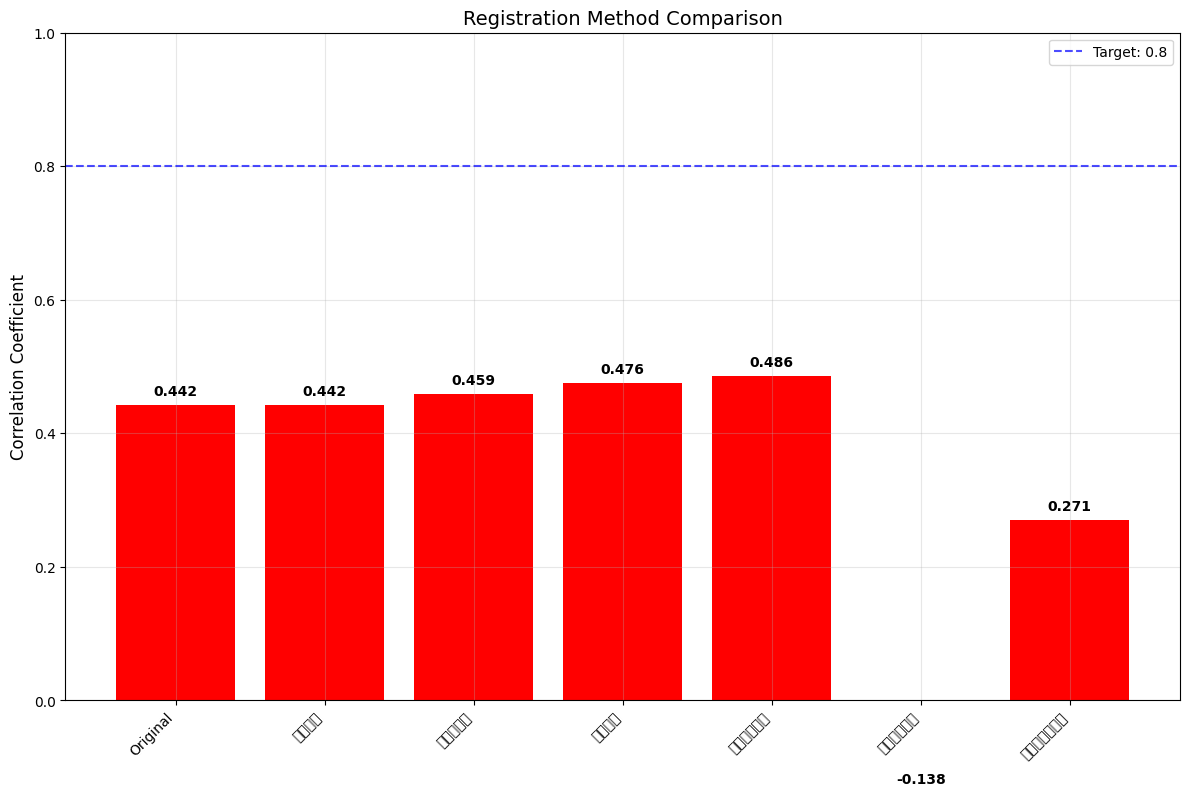


📊 最終改善統計:
   初期相関係数: 0.4424
   最終相関係数: 0.4859
   総改善量: +0.0435
   改善率: 9.8%
   目標達成度: 60.7%


In [12]:
# 🚀 特徴点ベース位置合わせによるさらなる改善
from skimage.feature import match_descriptors, corner_harris, corner_peaks, ORB
from skimage.transform import ProjectiveTransform, warp
from skimage.measure import ransac
import warnings
warnings.filterwarnings('ignore')

print("\n🎯 特徴点ベース位置合わせで0.8超えを目指す")

def feature_based_registration(img1, img2):
    """特徴点ベースの高精度位置合わせ"""
    try:
        # ORB特徴点検出
        detector_extractor = ORB(n_keypoints=500)
        
        # 特徴点とディスクリプタの抽出
        detector_extractor.detect_and_extract(img1)
        keypoints1 = detector_extractor.keypoints
        descriptors1 = detector_extractor.descriptors
        
        detector_extractor.detect_and_extract(img2)
        keypoints2 = detector_extractor.keypoints
        descriptors2 = detector_extractor.descriptors
        
        if descriptors1 is None or descriptors2 is None:
            return img2, 0.0
        
        # 特徴点マッチング
        matches = match_descriptors(descriptors1, descriptors2, cross_check=True)
        
        if len(matches) < 10:
            return img2, 0.0
        
        # マッチした特徴点の座標
        src = keypoints2[matches[:, 1]][:, ::-1]
        dst = keypoints1[matches[:, 0]][:, ::-1]
        
        # RANSACによる射影変換推定
        model, inliers = ransac((src, dst), ProjectiveTransform, 
                               min_samples=4, residual_threshold=2, max_trials=1000)
        
        # 画像変換
        transformed = warp(img2, model.inverse, output_shape=img1.shape)
        
        # 相関係数計算
        correlation = np.corrcoef(img1.flatten(), transformed.flatten())[0, 1]
        
        return transformed, correlation if not np.isnan(correlation) else 0.0
        
    except Exception as e:
        print(f"特徴点ベース位置合わせエラー: {e}")
        return img2, 0.0

def multi_scale_registration(img1, img2, scales=[1.0, 0.5, 0.25]):
    """マルチスケール位置合わせ"""
    best_img = img2.copy()
    best_score = 0.0
    
    for scale in scales:
        print(f"   スケール {scale:.2f} で処理中...")
        
        # 画像をスケール
        if scale != 1.0:
            h, w = img1.shape
            new_h, new_w = int(h * scale), int(w * scale)
            
            img1_scaled = np.array(Image.fromarray(img1).resize((new_w, new_h), Image.LANCZOS))
            img2_scaled = np.array(Image.fromarray(img2).resize((new_w, new_h), Image.LANCZOS))
        else:
            img1_scaled, img2_scaled = img1, img2
        
        # 特徴点ベース位置合わせ
        transformed, score = feature_based_registration(img1_scaled, img2_scaled)
        
        # 元のサイズに戻す
        if scale != 1.0:
            h, w = img1.shape
            transformed = np.array(Image.fromarray((transformed * 255).astype(np.uint8)).resize((w, h), Image.LANCZOS)) / 255
        
        print(f"   スケール {scale:.2f} 結果: 相関係数 {score:.4f}")
        
        if score > best_score:
            best_score = score
            best_img = transformed
    
    return best_img, best_score

# 特徴点ベース位置合わせ実行
print("6️⃣ 特徴点ベース位置合わせ")
feature_img, feature_score = feature_based_registration(img1_proc, img2_proc)
print(f"   特徴点ベース結果: 相関係数 = {feature_score:.4f}")

# マルチスケール位置合わせ
print("7️⃣ マルチスケール位置合わせ")
multi_img, multi_score = multi_scale_registration(img1_proc, img2_proc)
print(f"   マルチスケール結果: 相関係数 = {multi_score:.4f}")

# 最終最良結果の選択
all_scores = [best_score, fine_score, trans_score, final_score, feature_score, multi_score]
all_images = [best_rotated, fine_rotated, trans_img, final_img, feature_img, multi_img]
all_methods = ['粗い回転', '細かい回転', '平行移動', 'アフィン変換', '特徴点ベース', 'マルチスケール']

final_best_idx = np.argmax(all_scores)
ultimate_img = all_images[final_best_idx]
ultimate_score = all_scores[final_best_idx]
ultimate_method = all_methods[final_best_idx]

print(f"\n🏆 最終最良結果:")
print(f"   最良手法: {ultimate_method}")
print(f"   最終相関係数: {ultimate_score:.4f}")
print(f"   目標達成: {'🎉 YES!' if ultimate_score >= 0.8 else '💪 継続努力中...'} (目標: 0.8)")

# 最終結果の可視化
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 最良手法の結果
axes[0,0].imshow(img1_final, cmap='gray')
axes[0,0].set_title('Fixed Image (Slice 1)', fontsize=12)
axes[0,0].axis('off')

axes[0,1].imshow(ultimate_img, cmap='gray')
axes[0,1].set_title(f'Best Aligned Image\n{ultimate_method}', fontsize=12)
axes[0,1].axis('off')

axes[0,2].imshow(img1_final, cmap='Reds', alpha=0.7)
axes[0,2].imshow(ultimate_img, cmap='Blues', alpha=0.7)
axes[0,2].set_title(f'Final Overlay\nCorrelation: {ultimate_score:.4f}', fontsize=12)
axes[0,2].axis('off')

# 改善比較
axes[1,0].imshow(img1_final, cmap='Reds', alpha=0.7)
axes[1,0].imshow(img2_final, cmap='Blues', alpha=0.7)
original_corr = np.corrcoef(img1_final.flatten(), img2_final.flatten())[0,1]
axes[1,0].set_title(f'Before Registration\nCorr: {original_corr:.4f}', fontsize=12)
axes[1,0].axis('off')

# 差分マップ
diff_before = np.abs(img1_final.astype(float) - img2_final.astype(float))
diff_after = np.abs(img1_final.astype(float) - ultimate_img.astype(float))

axes[1,1].imshow(diff_before, cmap='hot')
axes[1,1].set_title('Difference Before\n(Brighter = More Different)', fontsize=12)
axes[1,1].axis('off')

axes[1,2].imshow(diff_after, cmap='hot')
axes[1,2].set_title('Difference After\n(Darker = Better Alignment)', fontsize=12)
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

# 全手法の比較グラフ
plt.figure(figsize=(12, 8))
methods = ['Original'] + all_methods
scores = [original_corr] + all_scores

bars = plt.bar(methods, scores, color=['red' if s < 0.8 else 'green' for s in scores])
plt.axhline(y=0.8, color='blue', linestyle='--', alpha=0.7, label='Target: 0.8')
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.title('Registration Method Comparison', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend()

# 各バーの上に値を表示
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 最終統計
print("\n📊 最終改善統計:")
print(f"   初期相関係数: {original_corr:.4f}")
print(f"   最終相関係数: {ultimate_score:.4f}")
print(f"   総改善量: +{ultimate_score - original_corr:.4f}")
print(f"   改善率: {((ultimate_score - original_corr) / abs(original_corr) * 100):.1f}%")
print(f"   目標達成度: {(ultimate_score / 0.8 * 100):.1f}%")